In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Redes Convolutivas CNN

Las **capas convolutivas** son los bloques de construcción de las CNN. En estas redes, las neuronas en la capa de entrada no están conectadas a cada pixel de la imagen. Sólo se conectan a los pixeles que están dentro de su **campo de recepción** (dado por el tamaño de **parche** o **kernel**).

Lo mismo se cumple para las capas siguientes, esta característica le permite a la red concentrarse en características de bajo nivel en la primera capa, luego unirlas en características de más alto nivel en las capas siguientes y así sucesivamente.

Entonces cada capa está realmente representada en 2D, lo cual hace más simple emparejar las neuronas con sus entradas correspondientes.

**kernel:** Los pesos de las neuronas pueden ser representados como una imagen pequeña que tiene el tamaño del campo de recepción. Una capa a la cual se le aplica un filtro, devuelve como salida un **mapa de características** que resalta las áreas de la imagen que activan al máximo el kernel o flitro.

Estos filtros no se definen manualmente. Durante el entrenamiento la capa de convolución aprende automáticamente cuáles son los filtros más útilies para su tarea y las capas siguientes aprenden como combinarlos en patrones más complejos.

**Padding:** Para que cada capa tenga las mismas dimensiones que la capa anterior, es común agregar ceros en la capa de entrada _zero padding_
<center><img src="https://drive.google.com/uc?export=view&id=1l1KzjvY_OVbipRP7IYy7-YOI0pt-A44c" width= 500 alt="centered image"></center>

**Stride:** También es posible conectar una capa de entrada más grande a una más pequeña, espaciando los campos de recepción. Esto reduce la complejidad computacional del modelo. El espaciamiento entre una campo de recepción y el siguiente, se denomina stride
<center><img src="https://drive.google.com/uc?export=view&id=1l3gqDQ1vlxNEqt90_iyYPTMVuDbcwu92" width= 500 alt="centered image"></center>

**Apilamiento de mapas de características** En la práctica una capa de convolución tiene más de 1 kernel, por tanto se obtienen mapas de características, uno por kernel, esto es mejor representado en 3D:
<center><img src="https://drive.google.com/uc?export=view&id=1l4v27c9rpvhPB7C2ZItGP06MlBaS5zzW" width= 500 alt="centered image"></center>

### Ejemplo de convolución



In [5]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

(427, 640, 3)


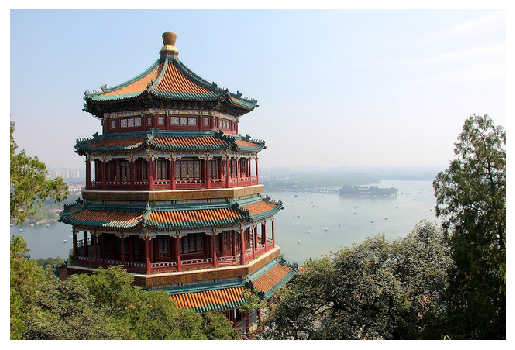

In [6]:
from sklearn.datasets import load_sample_image

# cargo imágenes de muestra y las escalo entre 0-1
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
plot_color_image(china)
print(china.shape)

(427, 640, 3)


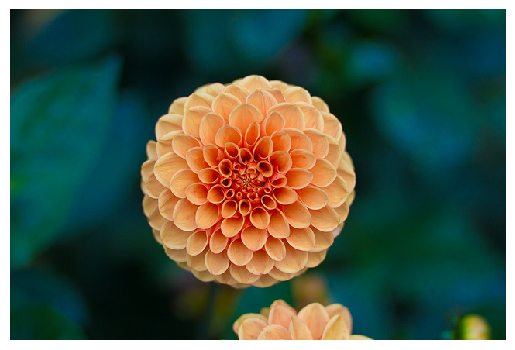

In [7]:
plot_color_image(flower)
print(flower.shape)

In [8]:
# mini-batch de 2 imágenes
imagenes = np.array([china, flower])
batch_size, height, width, canales = imagenes.shape
print("Dimensión de entrada: ", imagenes.shape)

# Creo 2 filtros de 7x7
filtros = np.zeros(shape=(7, 7, canales, 2), dtype=np.float32)
print("Dimensión de los kernels: ", filtros.shape)
filtros[:, 3, :, 0] = 1  # linea vertical blanca
filtros[3, :, :, 1] = 1  # linea horizontal blanca

outputs = tf.nn.conv2d(imagenes, filtros, strides=1, padding="SAME")
# como tenemos 2 filtros
# para cada imagen de entrada, obtengo 2 mapas de características
# nro de imagenes, alto, ancho, nro de mapas x imagen

print("Dimensión de salida: ", outputs.shape)

print(filtros[:,:,0,0])
print(filtros[:,:,0,1])
print(filtros[:,:,2,1])

Dimensión de entrada:  (2, 427, 640, 3)
Dimensión de los kernels:  (7, 7, 3, 2)
Dimensión de salida:  (2, 427, 640, 2)
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


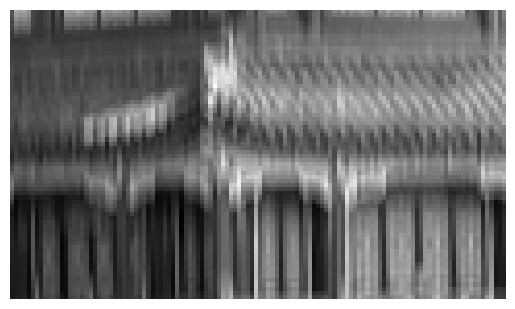

In [9]:
# grafico el primer mapa de características para la 1era imagen
# imagen con filtro de linea vertical blanca
# recorto la imagen [150:220, 130:250]
plt.imshow(outputs[0, :, :, 0][150:220, 130:250], cmap="gray")
plt.axis("off")
plt.show()

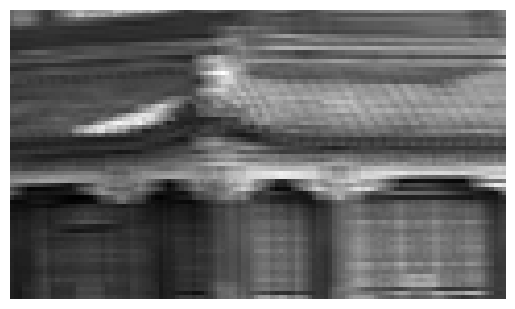

In [10]:
# grafico el segundo mapa de características para la 1era imagen
# imagen con filtro de linea horizontal blanca
plt.imshow(outputs[0, :, :, 1][150:220, 130:250], cmap="gray")
plt.axis("off")
plt.show()

## Usando una capa de convolución
Creamos una capa de convolución 2D usando **keras.layers.Conv2D()**

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

conv = keras.layers.Conv2D(
                            filters=2,
                            kernel_size=7,
                            strides=1,
                            padding="SAME",
                            activation="relu",
                            input_shape= [427, 640, 3]
                          )

c:\Users\yeyer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Aplicamos esta capa a las imágenes

In [12]:
conv_outputs = conv(imagenes)
conv_outputs.shape

TensorShape([2, 427, 640, 2])

La salida es un tensor 4D. Las dimensiones son: tamaño de batch, alto, ancho, nro de mapas de características. La primera dimensión (tamaño del batch) porque tenemos 2 imágenes de entrada. Las siguientes dos dimensiones son la altura y ancho de los mapas de características de salida: dado que **padding="SAME"** y **strides=1**, los mapas de características de salida tienen las mismas dimensiones que las imágenes de entrada (en este caso 427×640). Esta capa convolucional tiene 2 filtros, por esto, la última dimensión es 2: hay 2 mapas de características de salida por cada imagen de entrada.

Para determinar cada dimensión del mapa de características de salida se puede utilizar la siguiente fórmula:

$$o={\frac{n+2p-m}{s}} + 1$$

asumiendo que $n$ es una de las dimensiones de la imagen de entrada, $m$ la dimensión del kernel, $p$ el valor de padding y $s$ el stride

Los filtros de la función Conv2D se inicializan aleatoriamente, por ende, se detectarán patrones aleatorios. Echemos un vistazo a los 2 mapas de características de salida para cada imagen:

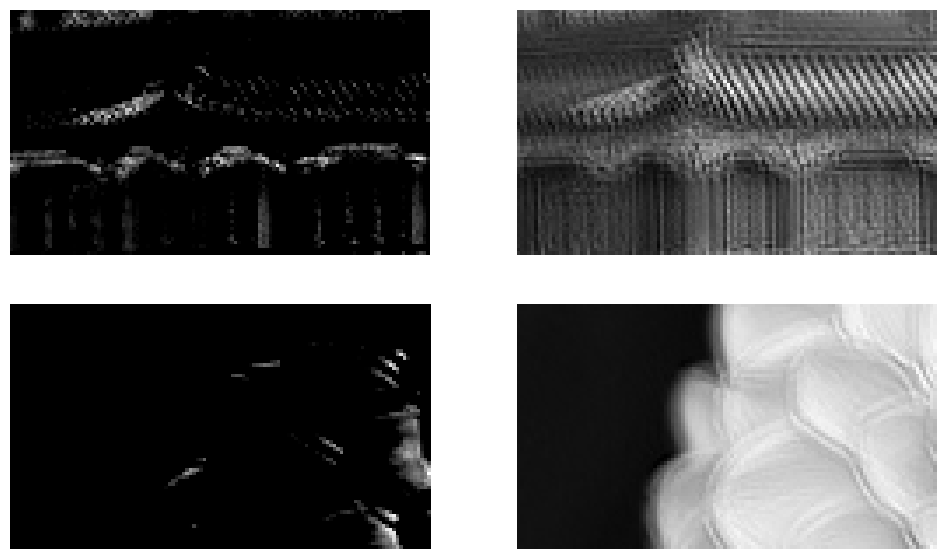

In [13]:
plt.figure(figsize=(12,7))
for indice in (0, 1):
    for indice_mapa in (0, 1):
        plt.subplot(2, 2, indice * 2 + indice_mapa + 1)
        plot_image(conv_outputs[indice, :, :, indice_mapa][150:220, 130:250])
plt.show()

Aunque los filtros se inicializaron aleatoriamente, el segundo filtro actúa como un detector de bordes. Los filtros inicializados aleatoriamente a menudo actúan de esta manera, lo cual está bueno ya que la detección de bordes es bastante útil en el procesamiento de imágenes.

Si queremos, podemos configurar los filtros para que sean como los definidos anteriormente en cero. Casi nunca necesitaremos configurar filtros manualmente, ya que la capa convolucional solo aprenderá los filtros adecuados durante el entrenamiento

In [14]:
conv.set_weights([filtros, np.zeros(2)])

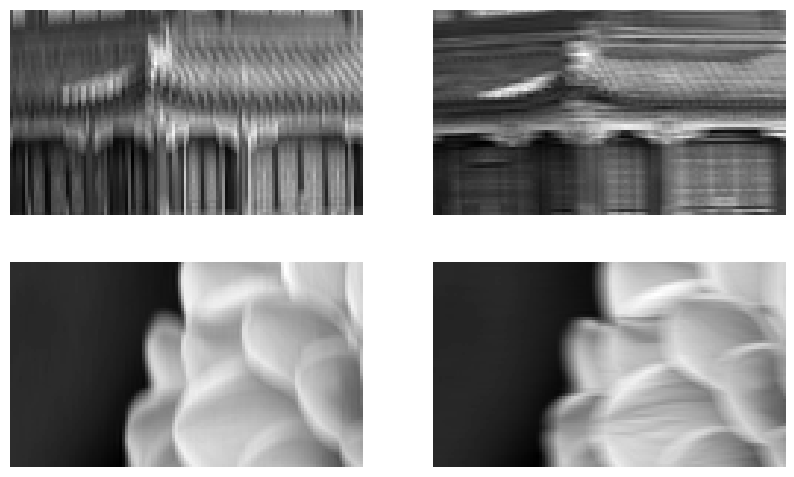

In [15]:
conv_outputs = conv(imagenes)

plt.figure(figsize=(10,6))
for indice in (0, 1):
    for indice_mapa in (0, 1):
        plt.subplot(2, 2, indice * 2 + indice_mapa + 1)
        plot_image(conv_outputs[indice, :, :, indice_mapa][150:220, 130:250])
plt.show()

### Pooling

Otro tipo de capa presente en las CNN, su objetivo es “submuestrear” la imagen de entrada para reducir la carga computacional, uso de memoria y disminuir número de parámetros, por tanto disminuye el riesgo de overfitting.
Al igual que con las capas de convolución, cada neurona en la capa pooling está conectada a las salidas de un número limitado de neuronas de la capa anterior dentro del campo de recepción. También se debe definir su tamaño, el stride y el tipo de padding. Sin embargo las neuronas de la capa de pooling no tienes pesos

**Max pooling:** En este caso, sólo el valor máximo del campo de recepción pasa a la siguiente capa. En general se aplican a cada canal de entrada de forma independiente.
<center><img src="https://drive.google.com/uc?export=view&id=1kYdnLDATkI4daQvR9ivxXi7tS-jJ6lxi" width= 500 alt="centered image"></center>
A continuación se crea una capa de Max pooling con kernel 2x2

In [16]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
#pool_size: tamaño del kernel
# por defecto stride = tamaño del kernel, padding='valid'

In [17]:
img_recortadas = np.array([imagen[150:220, 130:250] for imagen in imagenes], dtype=np.float32)
img_recortadas.shape

(2, 70, 120, 3)

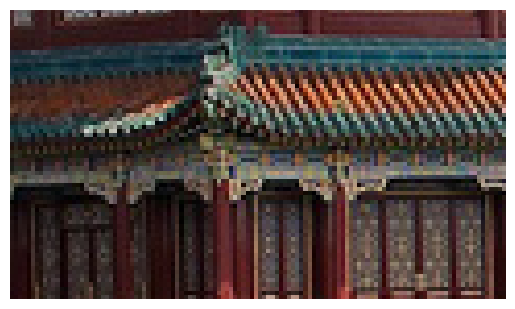

In [18]:
plot_color_image(img_recortadas[0])

Aplicamos a las imágenes recortadas la capa de Max pooling

In [19]:
output_max = max_pool(img_recortadas)
output_max.shape

TensorShape([2, 35, 60, 3])

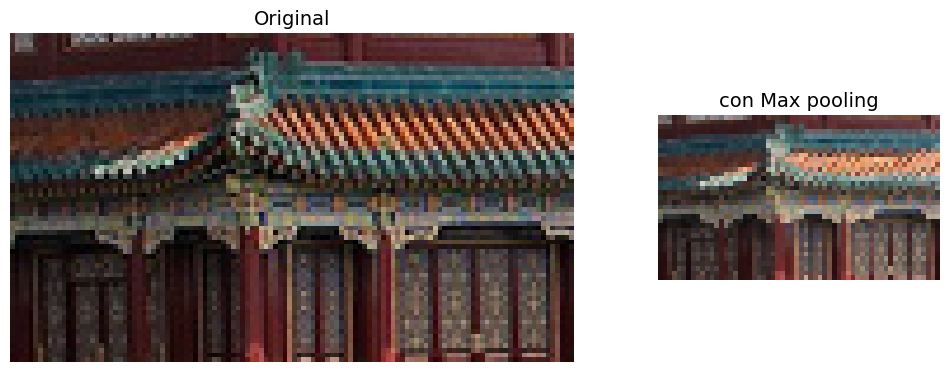

In [20]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Original", fontsize=14)
ax1.imshow(img_recortadas[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("con Max pooling", fontsize=14)
ax2.imshow(output_max[0])
ax2.axis("off")
plt.show()

**Average pooling:** calcula el promedio de los valores en el campo de recepción

In [21]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [22]:
output_avg = avg_pool(img_recortadas)
output_avg.shape

TensorShape([2, 35, 60, 3])

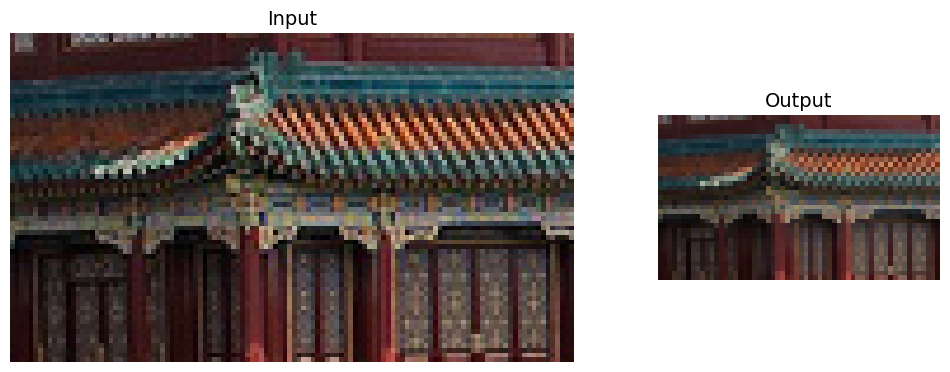

In [23]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(img_recortadas[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

**Global Average Pooling:** calcula el promedio pero con todo el mapa de características de entrada

In [24]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

In [25]:
output_g_avg = global_avg_pool(img_recortadas)
output_g_avg #obtenemos la intensidad media de los 3 canales RGB para cada imagen

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788801 , 0.22507527, 0.20967631],
       [0.51287866, 0.45952484, 0.3342377 ]], dtype=float32)>

**Dropout** es una de las técnicas de regularización más populares en deep learning. Es un algoritmo bastante simple: en cada paso de entrenamiento, cada neurona (incluidas las neuronas de entrada, pero siempre excluyendo las neuronas de salida) tienen una probabilidad $p$ de ser temporalmente "desconectadas", lo que significa que se ignorará por completo durante esa iteración de entrenamiento, pero puede estar activa en la siguiente. El hiperparámetro $p$ se denomina **dropout rate** y, por lo general, se establece entre el 10% y el 50 %: más cerca de 20–30% en redes neuronales recurrentes, y más cerca del 40-50% en redes convolucionales. Después del entrenamiento, las neuronas no se descontectan más.